In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
import warnings
from scipy.io import arff
from matplotlib import gridspec
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# Data Preparation

Data Background:

Data Source : https://www.openml.org/d/42175

Context:
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content:
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [2]:
data = arff.loadarff('C:/dtaset.arff')
df = pd.DataFrame(data[0])
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df1 = df
df1['Class'] = df1['Class'].astype(np.int64)
display(df1.head())
display(df1['Class'].value_counts())
display(np.round((df['Class'].value_counts(normalize=True) * 100),2))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    284315
1       492
Name: Class, dtype: int64

0    99.83
1     0.17
Name: Class, dtype: float64

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.859575,47488.145955,0.0,54201.5,84692.0,139320.500,172792.00
Amount,284807.0,88.349619,250.120109,0.0,5.6,22.0,77.165,25691.16


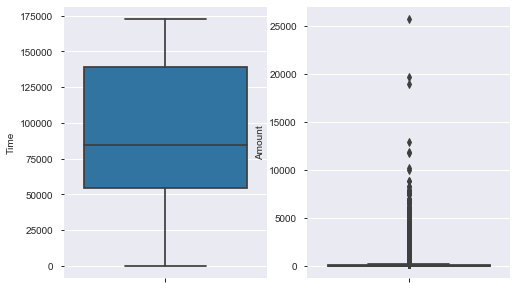

In [4]:
features = ['Time', 'Amount']
display(df1[features].describe().transpose())

fig, axes = plt.subplots(1, 2, figsize=(8, 5))
for i, col in enumerate(features):
    ax = sns.boxplot(y=df1[col], ax=axes.flatten()[i])
    ax.set_ylabel(col, rotation=90, fontsize=10)
plt.show()

In [5]:
Normal = df1[df1['Class'] == 0]
Fraud = df1[df1['Class'] == 1]

print("Amount Stats for Normal Transactions")
display(Normal.Amount.describe())
print("Amount Stats for Fraud Transactions")
display(Fraud.Amount.describe())

Amount Stats for Normal Transactions


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Amount Stats for Fraud Transactions


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [6]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#Creating 2 datasets : One with Amount variable and Second with Amont variable standardized

df2 = df1
df2['Amount_Std'] = StandardScaler().fit_transform(df2['Amount'].values.reshape(-1, 1))
df2 = df2.drop('Amount', axis = 1)
display(df2.head())
df1 = df1.drop('Amount_Std', axis = 1)
display(df1.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Std
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


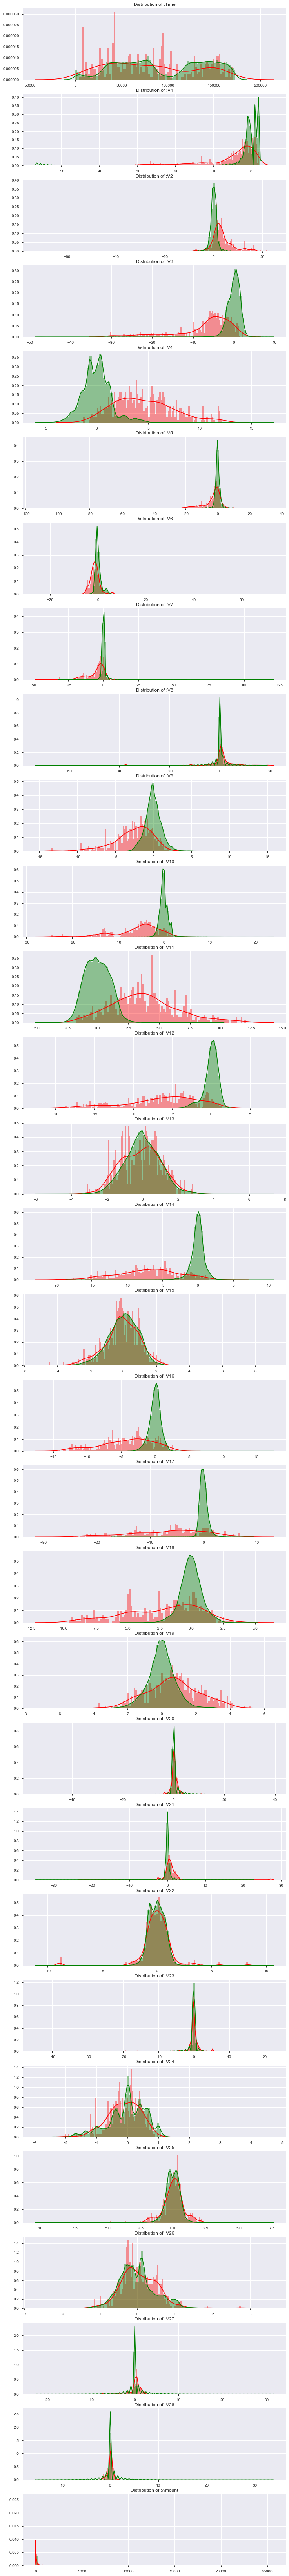

In [8]:
# Plots to compare the distribution of variables between Normal and Fraud condition.

features = df1.iloc[:,0:(len(df1.columns)-1)].columns

plt.figure(figsize=(12,(len(df1.columns)-1)*4))
grd_spc = gridspec.GridSpec((len(df1.columns)-1), 1)

for i, ft in enumerate(df1[features]):
    axs = plt.subplot(grd_spc[i])
    sns.distplot(df1[ft][df1.Class == 1], bins=100, color='red')
    sns.distplot(df1[ft][df1.Class == 0], bins=100, color='green')
    axs.set_xlabel('')
    axs.set_title('Distribution of :' + str(ft))
        
plt.show() 

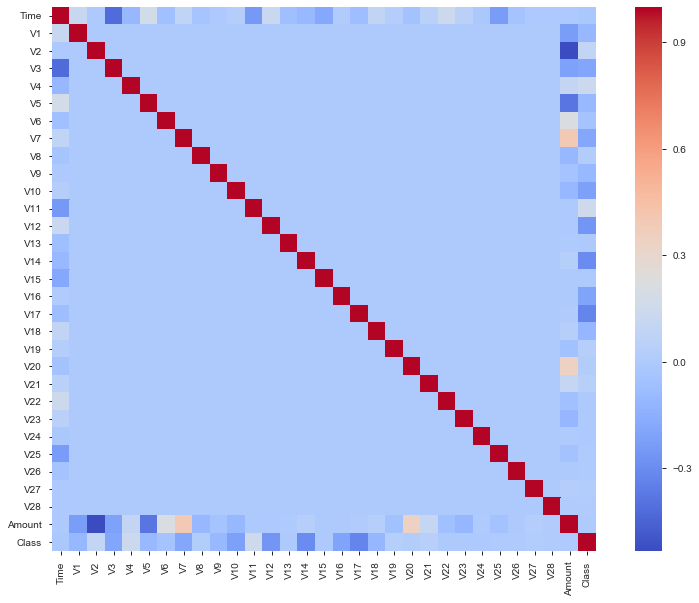

In [9]:
# Variables Correlation plot

fig = plt.figure(figsize = (14, 10))
sns.heatmap(df1.corr(), vmax = 1.0, square = True, cmap= 'coolwarm') #annot = True, fmt='.1g'
plt.show()

In [10]:
#Creating dataset by collection the fraud transactions 

df_fraud = df1[df1['Class'] == 1]
display(df_fraud.head())
display(df_fraud.shape)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


(492, 31)

In [11]:
#Randomly selecting 508 (492+16) Normal Transaction rows to make new dataset with 1000 rows.

df_normal = df1[df1['Class'] == 0].sample(n=(16+len(df_fraud.index)), random_state=42)
display(df_normal.head())
display(df_normal.shape)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0


(508, 31)

In [12]:
# Calculated Fraud ratio : 0.17%

anomaly_ratio = (len(Fraud))/(float(len(Normal)))
anomaly_ratio*100

0.17304750013189596

In [13]:
#Random dataset of 1000 rows : 492 Fraud and 508 Normal transactions

df_US = pd.concat([df_fraud, df_normal])
df_US = df_US.sort_index()
display(df_US.shape)
display(df_US['Class'].value_counts())
display(df_US['Class'].value_counts(normalize=True) * 100)
#display(df_RUS)
df_US = df_US.reset_index(drop=True)
display(df_US.head())
display(df_US.tail())

(1000, 31)

0    508
1    492
Name: Class, dtype: int64

0    50.8
1    49.2
Name: Class, dtype: float64

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,607.0,1.038261,-0.301415,0.910167,0.863872,-0.741702,0.090125,-0.409753,0.076723,0.684990,...,0.134996,0.554309,-0.138944,0.168500,0.423859,0.530611,0.014980,0.028041,69.99,0
3,861.0,-0.945987,1.232753,0.820313,0.311064,0.981736,0.935188,0.566926,-0.008604,-0.621912,...,0.124922,0.284644,-0.197951,-1.326061,-0.161715,-0.382919,-0.488500,0.144470,10.00,0
4,1308.0,-1.379848,0.536720,2.647870,1.408111,0.126442,0.986525,0.960251,-0.629717,1.729173,...,-0.666874,-0.343574,0.022138,0.093532,0.011293,-0.503395,-0.438189,-0.346731,43.80,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
995,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1
996,170846.0,2.237256,-1.277067,-0.508643,-1.243620,-1.813798,-1.616728,-0.961207,-0.372181,-1.295114,...,-0.110137,0.210433,0.340176,0.914126,-0.287532,-0.218192,0.010060,-0.042277,15.00,0
997,171211.0,-0.948819,3.010633,-1.784999,4.909892,-0.124091,-0.260746,-0.486861,1.447982,-2.087255,...,-0.299527,-0.971992,0.360957,-0.254898,-0.620193,0.043276,0.150002,-0.013614,12.11,0
998,171621.0,-10.979719,9.441250,-7.679816,-3.091572,-2.606832,-1.688433,-1.565577,3.600139,5.232322,...,-0.689142,0.222755,0.493056,0.094231,1.497581,-0.029859,0.657312,-0.707135,1.46,0
999,171917.0,-0.313639,0.970788,-0.332331,-0.683068,1.099515,-0.607829,1.080908,-0.255495,0.036392,...,-0.365547,-0.647241,0.164405,0.670895,-0.412503,0.054912,0.063312,-0.094941,15.98,0


# Modelling : Traditional Method

In [14]:
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve, f1_score, matthews_corrcoef

In [15]:
# Function to bulid a Classificaiton report containing Confusion Matrix, ROC-AUC score , Precision score , Recall score

def clf_report(Y_test, Y_pred): #, probs
    n_err = (Y_pred != Y_test).sum()
    print("Total Errors : ", n_err)
    print("\n", "Confusion Matrix")
    Labels = ['Normal', 'Fraud'] 
    cm = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, xticklabels=Labels, yticklabels=Labels, annot=True, cbar=False, fmt='d')
    plt.title('Confusion matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    print("Overall Accuracy : ", round(accuracy_score(Y_test, Y_pred) * 100, 2))
    print("Precision Score : ", round(precision_score(Y_test, Y_pred, average='binary') * 100, 2))
    print("Recall Score : ", round(recall_score(Y_test, Y_pred, average='binary') * 100, 2))
    print("f1 Score : ", round(f1_score(Y_test, Y_pred, average='binary') * 100, 2))
    print("Matthews correlation coefficient : ", round(matthews_corrcoef(Y_test, Y_pred), 2))

In [16]:
# Function for Isolation Forest Models

def IFM(X, Y):
    clf = IsolationForest(max_samples=len(X), contamination=anomaly_ratio, bootstrap=True, random_state=42)
    clf.fit(X )
    Y_pred = clf.predict(X)
    Y_pred[Y_pred == 1] = 0
    Y_pred[Y_pred == -1] = 1
    clf_report(Y, Y_pred)
    #Scores_pred = clf.decision_function(X)
    #Class_pred = clf.predict(X)
    #Class_pred[Class_pred == 1] = 0
    #Class_pred[Class_pred == -1] = 1
    #tmp_list = [Y.T, Scores_pred.T, Class_pred.T]
    #tmp_df = pd.DataFrame(data = tmp_list).T
    #tmp_df.columns = ['Class', 'Score', 'Prediction']

In [17]:
# Function for Local Outlier Factor Models

def LOF(X, Y):
    clf = LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski', 
                       p=2, metric_params=None, contamination=anomaly_ratio)
    Y_pred = clf.fit_predict(X)
    Y_pred[Y_pred == 1] = 0
    Y_pred[Y_pred == -1] = 1
    clf_report(Y, Y_pred)
    #Scores_pred = clf.negative_outlier_factor_

In [18]:
# Function for Support Vector Machine Models

def OCSVM(X, Y):
    clf = OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.5, max_iter=-1)
    clf.fit(X)
    Y_pred = clf.predict(X)
    Y_pred[Y_pred == 1] = 0
    Y_pred[Y_pred == -1] = 1
    clf_report(Y, Y_pred)

In [19]:
# Function for Random Forest Classifier Model

def RFM(X_train, X_test, Y_train, Y_test):
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    #probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred) # probs

In [20]:
# Function to get details on the distribution of Fraud/Normal class distribution in Train/Test Dataset

def TTCB(X_train, X_test, Y_train, Y_test):
    print("Train Data Dimensions : ", X_train.shape)
    print("Test Data Dimensions : ", X_test.shape)
    print("Class distribution in Train \n",np.round((Y_train.value_counts(normalize=True) * 100),2))
    print("Class distribution in Test \n",np.round((Y_test.value_counts(normalize=True) * 100),2))

Modelling on different Datasets

1. Models on Original Dataset

In [21]:
Y = df1['Class']
X = df1.drop('Class', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.9, random_state = 42)
TTCB(X_train, X_test, Y_train, Y_test)

Train Data Dimensions :  (256326, 30)
Test Data Dimensions :  (28481, 30)
Class distribution in Train 
 0    99.83
1     0.17
Name: Class, dtype: float64
Class distribution in Test 
 0    99.84
1     0.16
Name: Class, dtype: float64


Unsupervised Anomaly Detection

Total Errors :  683

 Confusion Matrix


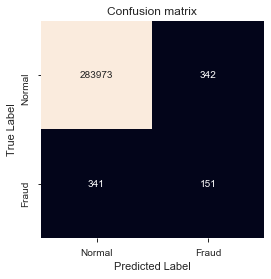

Overall Accuracy :  99.76
Precision Score :  30.63
Recall Score :  30.69
f1 Score :  30.66
Matthews correlation coefficient :  0.31
Wall time: 1min 16s


In [22]:
# Calling Isolation Forest Model
%time IFM(X, Y)

Total Errors :  935

 Confusion Matrix


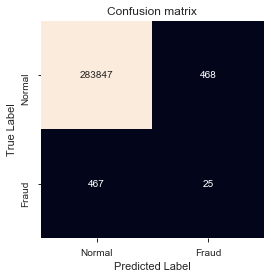

Overall Accuracy :  99.67
Precision Score :  5.07
Recall Score :  5.08
f1 Score :  5.08
Matthews correlation coefficient :  0.05
Wall time: 4min 35s


In [23]:
# Calling Local Outlier Factor Model
%time LOF(X, Y)

Supervised Anomaly Detection

Total Errors :  12

 Confusion Matrix


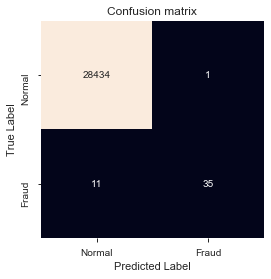

Overall Accuracy :  99.96
Precision Score :  97.22
Recall Score :  76.09
f1 Score :  85.37
Matthews correlation coefficient :  0.86
Wall time: 6min 37s


In [24]:
# Calling Random Forest Classifier Model
%time RFM(X_train, X_test, Y_train, Y_test)

2. Models on Dataset with Amount Standardized

In [25]:
Y = df2['Class']
X = df2.drop('Class', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.9, random_state = 42)
TTCB(X_train, X_test, Y_train, Y_test)

Train Data Dimensions :  (256326, 30)
Test Data Dimensions :  (28481, 30)
Class distribution in Train 
 0    99.83
1     0.17
Name: Class, dtype: float64
Class distribution in Test 
 0    99.84
1     0.16
Name: Class, dtype: float64


Unsupervised Anomaly Detection

Total Errors :  683

 Confusion Matrix


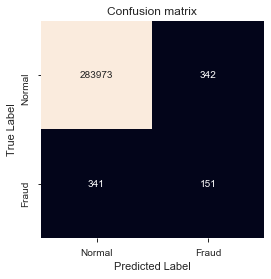

Overall Accuracy :  99.76
Precision Score :  30.63
Recall Score :  30.69
f1 Score :  30.66
Matthews correlation coefficient :  0.31
Wall time: 1min 40s


In [26]:
# Calling Isolation Forest Model calling 

%time IFM(X, Y)

Total Errors :  867

 Confusion Matrix


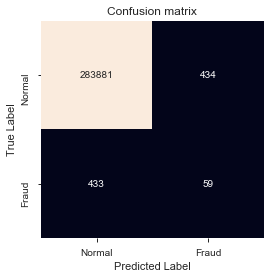

Overall Accuracy :  99.7
Precision Score :  11.97
Recall Score :  11.99
f1 Score :  11.98
Matthews correlation coefficient :  0.12
Wall time: 5min 17s


In [27]:
# Calling Local Outlier Factor Model

%time LOF(X, Y)

Supervised Anomaly Detection

Total Errors :  12

 Confusion Matrix


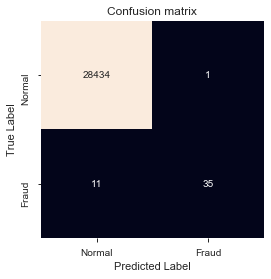

Overall Accuracy :  99.96
Precision Score :  97.22
Recall Score :  76.09
f1 Score :  85.37
Matthews correlation coefficient :  0.86
Wall time: 5min 55s


In [28]:
# Calling Random Forest Classifier Model

%time RFM(X_train, X_test, Y_train, Y_test)

3. Models with Class balance assigned

In [29]:
from sklearn.utils.class_weight import compute_class_weight

Supervised Anomaly Detection

In [30]:
# Calling Random Forest Classifier Model

Y = df1['Class']
X = df1.drop('Class', axis = 1)
class_weights = np.round((compute_class_weight('balanced', np.unique(Y), Y)),5)
print('Class Weights', "\n", class_weights)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.9, random_state = 42)
%time TTCB(X_train, X_test, Y_train, Y_test)

Class Weights 
 [  0.50087 289.43801]
Train Data Dimensions :  (256326, 30)
Test Data Dimensions :  (28481, 30)
Class distribution in Train 
 0    99.83
1     0.17
Name: Class, dtype: float64
Class distribution in Test 
 0    99.84
1     0.16
Name: Class, dtype: float64
Wall time: 20.9 ms


Wall time: 3min 34s
Total Errors :  13

 Confusion Matrix


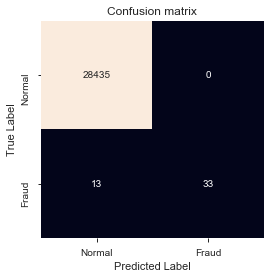

Overall Accuracy :  99.95
Precision Score :  100.0
Recall Score :  71.74
f1 Score :  83.54
Matthews correlation coefficient :  0.85


In [31]:
# Calling Random Forest Classifier Model with Class Weights

clf = RandomForestClassifier(class_weight={0:class_weights[0], 1:class_weights[1]}, random_state=42)
%time clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)
clf_report(Y_test, Y_pred)

4. Models on Dataset with Undersampling

In [32]:
Y = df_US ['Class']
X = df_US.drop('Class', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state = 42)
TTCB(X_train, X_test, Y_train, Y_test)

Train Data Dimensions :  (750, 30)
Test Data Dimensions :  (250, 30)
Class distribution in Train 
 0    52.13
1    47.87
Name: Class, dtype: float64
Class distribution in Test 
 1    53.2
0    46.8
Name: Class, dtype: float64


Supervised Anomaly Detection

Total Errors :  18

 Confusion Matrix


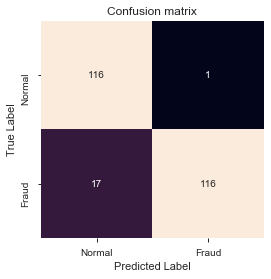

Overall Accuracy :  92.8
Precision Score :  99.15
Recall Score :  87.22
f1 Score :  92.8
Matthews correlation coefficient :  0.86
Wall time: 620 ms


In [33]:
# Calling Random Forest Classifier Model : Without Class Weights

%time RFM(X_train, X_test, Y_train, Y_test)

Class Weights 
 [0.98425 1.01626]
Wall time: 332 ms
Total Errors :  18

 Confusion Matrix


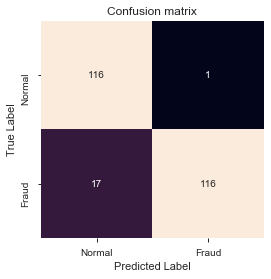

Overall Accuracy :  92.8
Precision Score :  99.15
Recall Score :  87.22
f1 Score :  92.8
Matthews correlation coefficient :  0.86


In [34]:
# Calling Random Forest Classifier Model : With Class weights

class_weights = np.round((compute_class_weight('balanced', np.unique(Y), Y)),5)
print('Class Weights', "\n", class_weights)

clf = RandomForestClassifier(class_weight={0:class_weights[0], 1:class_weights[1]}, random_state=42)
%time clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)
clf_report(Y_test, Y_pred)

# Modelling : PyCaret Method

In [35]:
Y = df1['Class']
X = df1.drop('Class', axis = 1)

In [36]:
from pycaret.anomaly import *

In [37]:
exp1= setup(df1, normalize = False, ignore_features = ['Class'], session_id = 42)


Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Original Data,"(284807, 31)"
2,Missing Values,False
3,Numeric Features,30
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(284807, 30)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [38]:
# Function to get classification reports for different models

def ad_res(m, Y):
    m_results = assign_model(m)
    m_results.head()
    Y_pred = m_results['Label']
    clf_report(Y, Y_pred)

Total Errors :  735

 Confusion Matrix


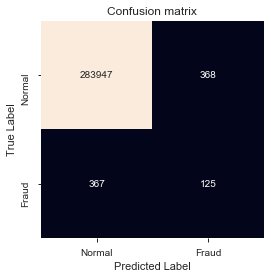

Overall Accuracy :  99.74
Precision Score :  25.35
Recall Score :  25.41
f1 Score :  25.38
Matthews correlation coefficient :  0.25


In [39]:
# Isolation Forest Model

%time m1 = create_model('iforest', fraction=anomaly_ratio)
ad_res(m1, Y)

Total Errors :  935

 Confusion Matrix


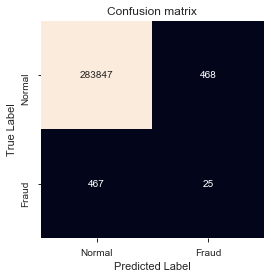

Overall Accuracy :  99.67
Precision Score :  5.07
Recall Score :  5.08
f1 Score :  5.08
Matthews correlation coefficient :  0.05


In [40]:
# Local Outlier Factor Model
 
%time m2 = create_model('lof', fraction=anomaly_ratio)
ad_res(m2, Y)

Total Errors :  757

 Confusion Matrix


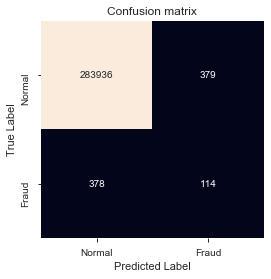

Overall Accuracy :  99.73
Precision Score :  23.12
Recall Score :  23.17
f1 Score :  23.15
Matthews correlation coefficient :  0.23


In [41]:
# PCA Model

%time m3 = create_model('pca', fraction=anomaly_ratio)
ad_res(m3, Y)